In [2]:
from connectivity import figures

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<Figure size 921.6x633.6 with 0 Axes>

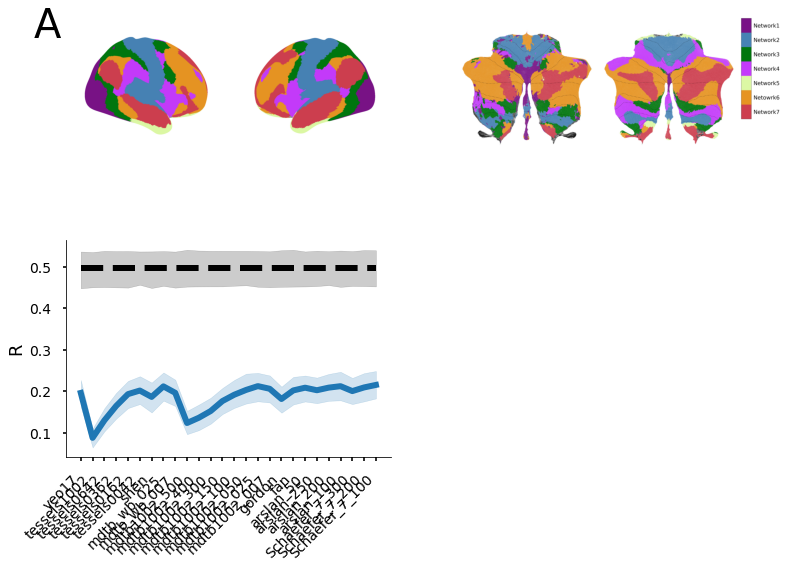

In [21]:
figures.fig1()